In [25]:
import cv2

In [26]:
import matplotlib.pyplot as plt

In [27]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [28]:
# load model
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [29]:

# labels are need to check answers are correct or not
classLabels = [] # empty list of python
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [30]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [31]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)



<dnn_Model 000001C49A7F7730>

# Read an Image

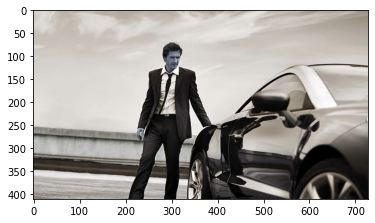

In [32]:
img = cv2.imread('man.jpg')
plt.imshow(img)

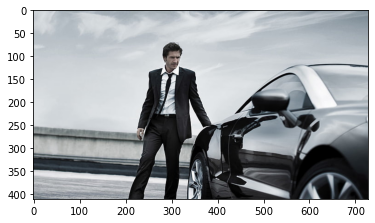

In [33]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [34]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [35]:
print(ClassIndex)

[[3]
 [1]]


In [36]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox): #flatten because there are 2 lists 
    cv2.rectangle(img,boxes,(255, 0, 0),2)
    cv2.putText(img,classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale= font_scale,color=(0, 255, 0),thickness=3)

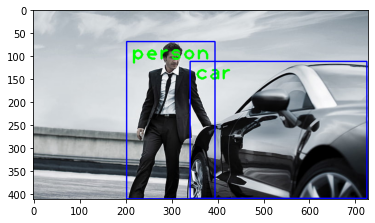

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video Demo

In [43]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot Open Video")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame,boxes,(255, 0, 0),2)
                cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale= font_scale,color=(0, 255, 0),thickness=3)
        
        
    
    cv2.imshow("Object detection Tutorial", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[1]]
[[1]]
[[1]]
[[ 1]
 [60]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [88]]
[[ 1]
 [88]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [88]
 [88]]
[[ 1]
 [88]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [60]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [60]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [6

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
()
()
()
()
()
()
()
()
()
[[1]]
[[1]]
[[1]]
[[18]]
[[ 1]
 [18]]
[[1]]
[[1]]
()
[[1]]
[[1]]
()
()
[[1]]
()
()
()
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [88]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[65]]
[[65]]
[[65]]
[[88]]
[[88]]
()
()
[[88]
 [ 1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[ 1]
 [90]]
[[ 1]
 [87]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [60]
 [60]]
[[ 1]
 [60]
 [60]]
[[ 1]
 [60]
 [60]]
[[ 1]
 [60]
 [60]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[

# Webcam demo

In [42]:
cap = cv2.VideoCapture('video.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot Open Video")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame,boxes,(255, 0, 0),2)
                cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale= font_scale,color=(0, 255, 0),thickness=3)
        
        
    
    cv2.imshow("Object detection Tutorial", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

                

[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [27]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [31]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [27]
 [ 1]
 [31]
 [27]
 [ 3]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [ 3]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 3]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [27]
 [ 3]
 [ 1]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [27]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [27]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [27]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [27]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 6]
 [ 1]
 [10]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [27]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [27]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [27]
 [ 1]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [27]
 [ 1]
 [ 1]
 [27]
 [ 3]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [27]
 [ 1]
 [27]
 [ 3]
 [27]
 [ 1]
 [27]]
[[ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [27]
 [27]
 [ 1]
 [27]
 [ 3]]
[

[[ 1]
 [ 1]
 [27]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 3]
 [31]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 3]
 [31]
 [ 1]
 [ 1]
 [ 3]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 3]
 [27]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 3]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [ 3]
 [27]
 [ 1]
 [ 3]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [27]
 [ 3]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [3

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [31]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [27]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 3]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [27]
 [ 1]
 [ 1]
 [ 

[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [31]
 [ 1]
 [31]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 3]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [31]]
[[ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 3]
 [ 1]
 [31]
 [31]]
[[1]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 3]
 [ 3]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]]
[[1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [31]
 [ 1]
 [15]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [77]
 [ 3]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [31]
 [33]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [31]
 [10]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]

[[3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [31]
 [ 3]
 [ 8]]
[[1]
 [1]
 [1]
 [1]
 [3]
 [3]
 [8]]
[[1]
 [1]
 [1]
 [1]
 [3]
 [8]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [8]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [8]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [8]
 [1]
 [3]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [8]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [8]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [3]
 [1]
 [1]
 [8]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [8]
 [1]
 [3]]
[[1]
 [1]
 [8]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [8]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [8]
 [3]]
[[1]
 [1]
 [1]
 [3]
 [3]
 [8]
 [1]]
[[1]
 [1]
 [3]
 [8]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [8]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [3]
 [8]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [8]]
[[1]
 [8]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [8]
 [1]
 [3]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [8]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [8]


[[3]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [64]
 [ 1]
 [ 3]]
[[ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [64]
 [ 3]]
[[ 3]
 [ 3]
 [ 1]
 [ 1]
 [64]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]]
[[ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [64]
 [ 1]
 [ 1]
 [ 3]]
[[ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [64]
 [ 1]
 [ 1]
 [ 3]]
[[3]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]]
[[ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [64]
 [ 3]]
[[ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [64]
 [ 1]]
[[3]
 [1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]]
[[ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [64]
 [ 1]
 [ 1]
 [ 3]
 [ 3]]
[[ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [64]
 [ 3]
 [ 1]
 [ 1]
 [ 1]]
[[3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[3]

[[1]
 [1]
 [8]
 [3]
 [1]
 [1]
 [1]
 [1]
 [6]
 [2]]
[[1]
 [1]
 [3]
 [8]
 [1]
 [1]
 [1]
 [1]
 [6]]
[[1]
 [1]
 [8]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]
 [6]]
[[1]
 [1]
 [3]
 [8]
 [1]
 [1]
 [2]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]
 [2]
 [8]]
[[1]
 [1]
 [3]
 [1]
 [2]
 [1]
 [8]]
[[1]
 [1]
 [1]
 [3]
 [2]
 [1]
 [2]]
[[1]
 [1]
 [3]
 [1]
 [2]
 [2]
 [1]
 [8]
 [8]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [2]
 [2]
 [8]]
[[1]
 [1]
 [3]
 [1]
 [1]
 [2]]
[[1]
 [1]
 [2]
 [1]
 [1]
 [3]
 [2]
 [8]
 [1]]
[[1]
 [1]
 [1]
 [2]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [2]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [2]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [2]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [2]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [2]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [2]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [2]
 [1]
 [8]]
[[1]
 [1]
 [1]
 [3]
 [8]
 [2]
 [8]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [2]]
[[1]
 [1]
 [3]
 [1]
 [2]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [2]
 [1]
 [2]]
[[1]
 [1]
 [3]
 [2]
 [1]
 [1]
 [2